In [70]:
import pandas as pd
df=pd.read_csv("user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [71]:
df.shape

(700, 11)

In [72]:
df.isnull().sum().sum()

np.int64(0)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Device Model']=le.fit_transform(df['Device Model'])
df['Operating System']=le.fit_transform(df['Operating System'])
df['Gender']=le.fit_transform(df['Gender'])


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    int64  
 2   Operating System            700 non-null    int64  
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    int64  
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.3 KB


In [76]:
df.rename(columns={"Operating System":"OS"},inplace=True)
df.rename(columns={"App Usage Time (min/day)":"AUT"},inplace=True)
df.rename(columns={"Screen On Time (hours/day)":"SOT"},inplace=True)
df.rename(columns={"Battery Drain (mAh/day)":"Battery"},inplace=True)
df.rename(columns={"Number of Apps Installed":"NOAI"},inplace=True)
df.rename(columns={"Data Usage (MB/day)":"DU"},inplace=True)
df.rename(columns={"User Behavior Class":"UBC"},inplace=True)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       700 non-null    int64  
 1   Device Model  700 non-null    int64  
 2   OS            700 non-null    int64  
 3   AUT           700 non-null    int64  
 4   SOT           700 non-null    float64
 5   Battery       700 non-null    int64  
 6   NOAI          700 non-null    int64  
 7   DU            700 non-null    int64  
 8   Age           700 non-null    int64  
 9   Gender        700 non-null    int64  
 10  UBC           700 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.3 KB


In [78]:
df['UBC'].value_counts()

UBC
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

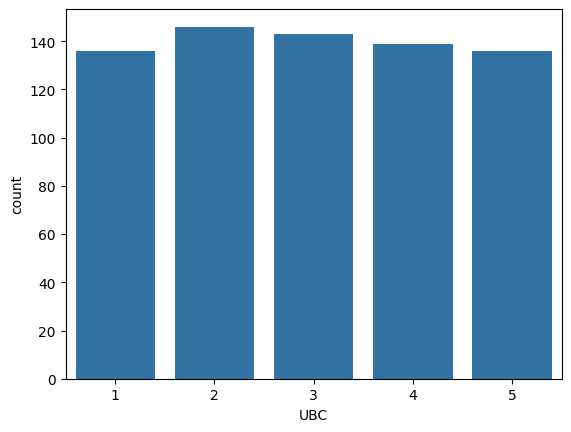

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df["UBC"])
plt.show()

In [80]:
#from imblearn.under_sampling import RandomUnderSampler                      #file
from imblearn.over_sampling import SMOTE
x=df.drop(columns="UBC",axis=1)
y=df["UBC"]
smote=SMOTE(sampling_strategy="minority")
#smote= RandomUnderSampler(sampling_strategy="majority")               #pip uninstall imbalanced-learn scikit-learn -y
x_sm,y_sm=smote.fit_resample(x,y)

In [81]:
print(x_sm.shape)
print(y_sm.shape)

(710, 10)
(710,)


In [82]:
y_sm.value_counts()

UBC
2    146
1    146
3    143
4    139
5    136
Name: count, dtype: int64

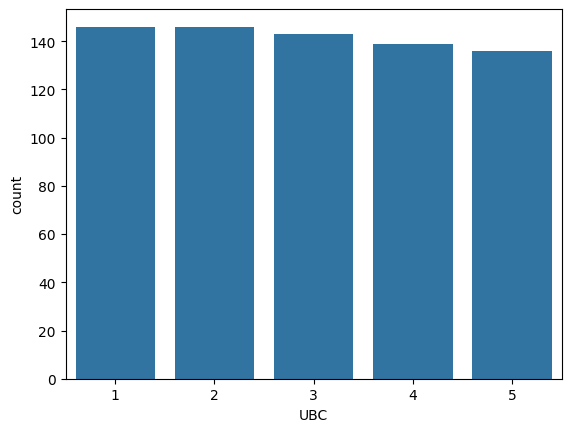

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y_sm)
plt.show()

In [84]:
x=df.drop(columns="UBC",axis=1)

y=df["UBC"]
x

,User ID,Device Model,OS,AUT,SOT,Battery,NOAI,DU,Age,Gender
0,1,0,0,393,6.4,1872,67,1122,40,1
1,2,1,0,268,4.7,1331,42,944,47,0
2,3,3,0,154,4.0,761,32,322,42,1
3,4,0,0,239,4.8,1676,56,871,20,1
4,5,4,1,187,4.3,1367,58,988,31,0
...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,381,22,1
696,697,3,0,316,6.8,1965,68,1201,59,1
697,698,0,0,99,3.1,942,22,457,50,0
698,699,2,0,62,1.7,431,13,224,44,1


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.        , 0.        , 0.        , ..., 0.42588727, 0.53658537,
        1.        ],
       [0.00143062, 0.25      , 0.        , ..., 0.35156576, 0.70731707,
        0.        ],
       [0.00286123, 0.75      , 0.        , ..., 0.09185804, 0.58536585,
        1.        ],
       ...,
       [0.99713877, 0.        , 0.        , ..., 0.14822547, 0.7804878 ,
        0.        ],
       [0.99856938, 0.5       , 0.        , ..., 0.05093946, 0.63414634,
        1.        ],
       [1.        , 0.25      , 0.        , ..., 0.30313152, 0.12195122,
        0.        ]], shape=(700, 10))

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[27  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [88]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)

In [89]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9857142857142858
[[25  2  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        27
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



In [96]:
model=SVC(C=50,kernel ="rbf",gamma=0.1,shrinking=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [97]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[27  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [92]:
model=SVC(C=100,kernel="rbf",gamma=0.1,shrinking=True)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)

In [93]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[27  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

